# CP213: Model Solutions for Tutorial Notebook 1


## Question 1

1. Find the exact value of the integral
   \begin{align*}
   \int_0^1 dx\, x^3.
   \end{align*}

2. Use the trapezium rule with four equal intervals to estimate the
   value of the integral.  Determine the percentage error between the
   exact value and the value estimated by the trapezium rule.

3. Repeat part 2. using eight equal intervals.

4. Make a plot of the percentage error between the exact value and the
   value estimated by the trapezium rule and the number $N$ of equal
   intervals used from $N=1$ to $100$.

## Model solution for Q1

### Part 1


We can easily perform this integral:
\begin{align*}
I &= \int_0^{1}  dx\,x^3
= \left.\frac{x^4}{4}\right]_0^1 = \frac{1}{4} = 0.25
\end{align*}

### Part 2

The area $\Delta A$ of a trapezoid with a base of length $\Delta x$, one side of height $h_1$ and the other side of height $h_2$ is
\begin{align*}
\Delta A &= \frac{\Delta x}{2}(h_1+h+2)
.
\end{align*}
If we 
then the approximation to the integral is just the sum of the set of areas of the corresponding trapezoids.
\begin{align*}
I \approx \sum_k \frac{x_{i+1}-x_i}{2}[f(x_{i+1}+f(x_i)]
\end{align*}

In [ ]:
import numpy as np

I_exact = 0.25

N = 4  
x_data = np.linspace(0.0, 1.0, N+1)  # N trapezoids leads to N+1 points
f_data = [x**3 for x in x_data]

I = 0.0
for k in range(N):
    I += 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])
print(f'trapezoid rule : {I}, exact: {I_exact}')
print(f'error = {(I-I_exact)/I_exact*100.0}%')

import pylab as plt

plt.plot(x_data, f_data, color='red')
plt.plot(x_data, f_data, 'o', color='red', label='trapezoid rule')

x_exact = np.linspace(0.0, 1.0, 1000)
f_exact = [x**3 for x in x_exact]
plt.plot(x_exact, f_exact, color='black', label='exact')

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()

plt.show()


### Part 3

We can simply reuse our previous code, but this time with $N=8$.  How convenient!

In [ ]:
import numpy as np

I_exact = 0.25

N = 8
x_data = np.linspace(0.0, 1.0, N+1)  # N trapezoids leads to N+1 points
f_data = [x**3 for x in x_data]

I = 0.0
for k in range(N):
    I += 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])
print(f'trapezoid rule : {I}, exact: {I_exact}')
print(f'error = {(I-I_exact)/I_exact*100.0}%')

import pylab as plt

plt.plot(x_data, f_data, color='red')
plt.plot(x_data, f_data, 'o', color='red', label='trapezoid rule')

x_exact = np.linspace(0.0, 1.0, 1000)
f_exact = [x**3 for x in x_exact]
plt.plot(x_exact, f_exact, color='black', label='exact')

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()

plt.show()

### Part 4

This problem requires us to repeat what we did for $N=4$ and $N=8$ a hundred times.  We can do this by putting what we did above into a loop.

In [ ]:
import numpy as np

I_exact = 0.25

N_data = range(1, 100)
I_data = []
for N in N_data:
    x_data = np.linspace(0.0, 1.0, N+1)  # N trapezoids leads to N+1 points
    f_data = [x**3 for x in x_data]

    I = 0.0
    for k in range(N):
        I += 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])
#    print(f'trapezoid rule : {I}, exact: {I_exact}')
#    print(f'error = {(I-I_exact)/I_exact*100.0}%')
    I_data.append(I)



plt.rcParams['figure.figsize'] = [10.0, 5.0]

plt.subplot(121)
plt.plot(N_data, I_data, 'o', color='red', label='trapezoid rule')
plt.xlabel('$N$')
plt.ylabel('$I$')
plt.plot(N_data, [I_exact for N in N_data], color='black', label='exact')
plt.legend()

plt.subplot(122)
error_data = [(I-I_exact)/I_exact*100.0 for I in I_data]
plt.plot(N_data, error_data, 'o', color='red')
plt.yscale('log')
plt.ylabel('error %')
plt.xlabel('N')

plt.tight_layout(pad=2)
plt.show()


## Question 2

A projectile initially located at the origin has an initial speed
$v_0=10\,{\rm m\,s}^{-1}$ directed at an angle of $\theta=30^\circ$
from the horizontal.  It travels a gravitational field $g=9.81\,{\rm
m\,s}^{-2}$ which points in the negative $y$-direction.

1. Write an equation for how the $x$- and $y$-coordinates of the
   particle change depend on time $t$.

2. When will the projectile strike the ground, which is located at
   $y=0$?

3. Plot the variation of the $x$- and $y$-coordinates of the
   projectile with time, from $t=0$ until it hits the ground.  Also,
   plot the trajectory (i.e. $y(t)$ vs $x(t)$) of the projectile.

4. Repeat parts 2 and 3 of the problem if the velocity of the projectile
   is at an angle of $60^\circ$ from the horizontal.  At what angle
   will the projectile travel the furthest in the $x$-direction?


## Model solution for Q2

### Part 1

First we need to determine the initial $x$- and $y$-components of the
projectile velocity.  From simple trigonometry, we have
$v_x(0) = v_0\cos\theta$ and $v_y(0)=v_0\sin\theta$

In this problem, the $x$ and $y$ motion of the projectile are
independent of each other.  There is no acceleration in the
$x$-direction, and so the $x$-component of the velocity is constant.
In this case, we have $x(t)=v_x(0) t$, where $t$ is the time.  The
projectile accelerates downward at a rate $g$, so the $y$-component of
the velocity varies with time as $v_y(t)=v_y(0) - gt$, which implies
that its $y$-position is given by $y(t)=v_y(0) t -\frac{1}{2} g t^2$.

In summary:
\begin{align*}
x(t) &= v_x(0) t = v_0 t \cos\theta
\\
y(t) &= v_y(0) t -\frac{1}{2} g t^2
= v_0 t\sin\theta -\frac{1}{2} g t^2
\end{align*}


### Part 2

To determine when the projectile will strike the ground, we need to
solve for the time when $y(t)=0$.
\begin{align*}
y(t) &= v_y(0) t -\frac{1}{2} g t^2
\\
0 &= v_y(0) t -\frac{1}{2} g t^2
\\
&= [v_y(0) - \frac{1}{2} g t] t
.
\end{align*}
There are two solution to this equation.  The solution $t=0$ is the
initial condition, and is not what we are looking for.  The other
solution is
\begin{align*}
0 &= v_y(0) - \frac{1}{2} g t 
\\
\frac{1}{2} g t &= v_y(0)
\\
t &= \frac{2v_y(0)}{g}
\end{align*}
which is the time the projectile will hit the ground.


In [ ]:
import numpy as np

g = 9.81
v0 = 10.0
theta = 30.0 * np.pi / 180.0

vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)

t = 2.0*vy0/g

print(f't = {t} seconds')


### Part 3



In [ ]:
import pylab as plt
import numpy as np

g = 9.81
v0 = 10.0
theta = 30.0 * np.pi / 180.0

vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)

t_final = 2.0*vy0/g
print(f't = {t_final} seconds')
dt = 0.01*t_final
t_data = np.arange(0.0, t_final, dt)

x_data = [vx0*t for t in t_data]
y_data = [vy0*t - 0.5*g*t**2 for t in t_data]

plt.plot(t_data, x_data, label=r'$x$-coordinate')
plt.plot(t_data, y_data, label=r'$y$-coordinate')
plt.xlabel('time / seconds')
plt.ylabel('coordinate / meters')
plt.legend()
plt.show()

plt.plot(x_data, y_data)
plt.xlabel(r'$x$-coordinate / m')
plt.ylabel(r'$y$-coordinate / m')
plt.show()



### Part 4

Changing the angle is rather trivial; we can just take the code we
developed previously and change the value of theta.


In [ ]:
import pylab as plt
import numpy as np

g = 9.81
v0 = 10.0
theta = 60.0 * np.pi / 180.0

vx0 = v0*np.cos(theta)
vy0 = v0*np.sin(theta)

t_final = 2.0*vy0/g
print(f't = {t_final} seconds')
dt = 0.01*t_final
t_data = np.arange(0.0, t_final, dt)

x_data = [vx0*t for t in t_data]
y_data = [vy0*t - 0.5*g*t**2 for t in t_data]

plt.plot(t_data, x_data, label=r'$x$-coordinate')
plt.plot(t_data, y_data, label=r'$y$-coordinate')
plt.xlabel('time / seconds')
plt.ylabel('coordinate / meters')
plt.legend()
plt.show()

plt.plot(x_data, y_data)
plt.xlabel(r'$x$-coordinate / m')
plt.ylabel(r'$y$-coordinate / m')
plt.show()


What is more interesting is the angle which leads to the farthest
distance of travel in the $x$-direction.  To find the distance that
the projectile travels before it hits the grounds, we note that
the time to hit the ground is $2v_y(0)/g$.  Then we can calculate the
$x$-position at that time:
\begin{align*}
x(t)
&= v_x(0) t
= v_x(0) \frac{2v_y(0)}{g}
\\
&= v_0\cos\theta \frac{2v_0\sin\theta}{g}
\\
&= \frac{v_0^2}{g} 2\sin\theta \cos\theta 
\\
&= \frac{v_0^2}{g} \sin 2\theta
\end{align*}
Note that the maximum value of the $\sin$ function occurs at
$90^\circ$, so the optimal angle is $45^\circ$, which we might have
guessed.


## Question 3

### Part 1

Plot the data set given in the code block below:

In [ ]:
x_dat = [1220, 1139, 1874, 1550, 1203, 1488, 2003, 1368, 1389, 1300, 1877, 1670, 1080, 1766, 1445, 1718, 1263, 1432, 1557, 1127]
y_dat = [42, 46.5, 28.5, 37.5, 43.5, 36, 21, 36, 37.5, 40.5, 27, 33, 49.5, 30, 39, 31.5, 48, 21, 34.5, 61.5]


### Part 2

The average value of $x$ and $y$, denoted by $\bar{x}$ and $\bar{y}$, respectively, are defined by
\begin{align*}
\bar{x} &= \frac{1}{N}\sum_{k=0}^{N-1} x_k
\\
\bar{y} &= \frac{1}{N}\sum_{k=0}^{N-1} y_k
\end{align*}
where $N$ is the number of data points.

Compute $\bar{x}$ and $\bar{y}$ for the data set provided.


### Part 3

The variance of $x$ (denoted by $S_{xx}$), the variance of $y$
(denoted by $S_{yy}$), and the covariance between $x$ and $y$ (denoted
by $S_{xy}$) are defined as:
\begin{align*}
S_{xx} &= \frac{1}{N}\sum_{k=0}^{N-1} (x_k-\bar{x})^2
\\
S_{xy} &= \frac{1}{N}\sum_{k=0}^{N-1}(x_k-\bar{x})(y_k-\bar{y})
\\
S_{yy} &= \frac{1}{N} \sum_{k=0}^{N-1}(y_k-\bar{y})^2
\end{align*}
Compute $S_{xx}$, $S_{xy}$, and $S_{yy}$.


### Part 4

The general equation for the best fit line through a set of data is
given by:
\begin{align*}
y &= ax + b
\end{align*}
where the slope $a$ and the intercept $b$ are given by
\begin{align*}
a &= \frac{S_{xy}}{S_{xx}}
\\
b &= \bar{y} - a \bar{x}
.
\end{align*}
We will derive these equation next semester in the module.

Plot the equation of the best fit line along with the original data.


## Model solutions for Q3

### Part 1

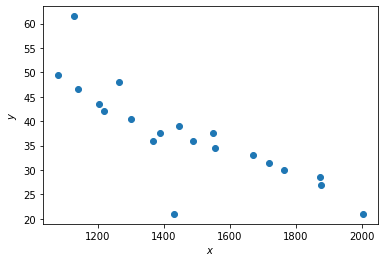

In [1]:
x_dat = [1220, 1139, 1874, 1550, 1203, 1488, 2003, 1368, 1389, 1300, 1877, 1670, 1080, 1766, 1445, 1718, 1263, 1432, 1557, 1127]
y_dat = [42, 46.5, 28.5, 37.5, 43.5, 36, 21, 36, 37.5, 40.5, 27, 33, 49.5, 30, 39, 31.5, 48, 21, 34.5, 61.5]

import pylab as plt

plt.plot(x_dat, y_dat, 'o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### Part 2

In [2]:
N = len(x_dat)

xbar = 0.0
ybar = 0.0
for x, y in zip(x_dat, y_dat):
    xbar += x
    ybar += y
xbar /= N
ybar /= N

print(r'$\bar{x}$ = ', xbar)
print(r'$\bar{y}$ = ', ybar)

$\bar{x}$ =  1473.45
$\bar{y}$ =  37.2


### Part 3

In [3]:
N = len(x_dat)

S_xx = 0.0
S_yy = 0.0
S_xy = 0.0
for x, y in zip(x_dat, y_dat):
    S_xx += (x-xbar)*(x-xbar)
    S_xy += (x-xbar)*(y-ybar)
    S_yy += (y-ybar)*(y-ybar)
S_xx /= N
S_xy /= N
S_yy /= N

print(r'$S_xx$ = ', S_xx)
print(r'$S_xy$ = ', S_xy)
print(r'$S_yy$ = ', S_yy)

$S_xx$ =  71000.54750000002
$S_xy$ =  -2106.915
$S_yy$ =  91.93499999999999


### Part 4

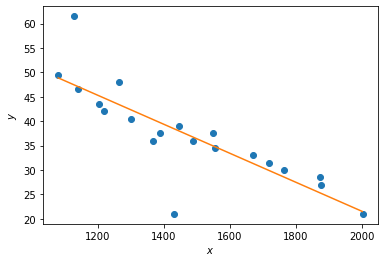

In [4]:
a = S_xy/S_xx
b = ybar - a*xbar

import numpy as np
import pylab as plt

x_fit = np.arange(min(x_dat), max(x_dat))
y_fit = [a*x + b for x in x_fit]


plt.plot(x_dat, y_dat, 'o')
plt.plot(x_fit, y_fit)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

## Question 4

Consider the gas-water shift reaction
\begin{align*}
{\rm 
CO(g) + H_2O(g) \leftrightarrows CO_2(g) + H_2(g)
}
\end{align*}

| gas       | $M_w$        | $H_f$         | $G_f$         |
| :--       | --:        | --:           | --:           |
|           | g mol$^{-1}$ | kJ mol$^{-1}$ | kJ mol$^{-1}$ |
| CO(g)     | $28.01$    | $ -110.5$     | $ -137.2$     |
| CO$_2$(g) | $44.01$    | $ -393.3$     | $ -394.6$     |
| H$_2$(g)  | $ 2.02$    | $    0.0$     | $    0.0$     |
| H$_2$O(g) | $18.02$    | $ -241.8$     | $ -228.4$     |
|           |            |               |               |


The data in the table have been summarized in the dictionary `data`.  The stoichiometric coefficients (the stoichiometric coefficient for species $k$ is typically denoted by the symbol $\nu_k$) of the reaction are held in the dictionary `nu`.  Note that product species have a positive stoichiometric coefficient, and reactant species have a negative stoichiometric coefficient.

In [ ]:
R = 8.314e-3  # ideal gas constant / kJ mol^{-1} K^{-1}
T0 = 298.15   # reference temperature / K
p0 = 1.0e5    # reference pressure / Pa


# Data about the gases: 
#  Mw - molecular weight g/mol
#  Hf - heat of formation 
#  Gf - Gibbs free energy 
data = {}
data['CO']  = {'Mw':28.01, 'Hf':-110.5, 'Gf':-137.2 }
data['CO2'] = {'Mw':44.01, 'Hf':-393.3, 'Gf':-394.6 }
data['H2']  = {'Mw': 2.02, 'Hf':   0.0, 'Gf':   0.0 }
data['H2O'] = {'Mw':18.02, 'Hf':-241.8, 'Gf':-228.4 }


# stoichiometric coefficients
nu = {} 
nu['CO']  = -1.0
nu['CO2'] =  1.0 
nu['H2']  =  1.0
nu['H2O'] = -1.0

### Part 1: Standard reaction enthalpy and Gibbs energy

The standard enthalpy of reaction $\Delta H_{\rm rxn}$ is defined by
\begin{align*}
\Delta H_{\rm rxn}
&= \sum_k \nu_k H_{f,k}
\end{align*}
where $H_{f,k}$ is the standard enthalpy of formation of species $k$.  The standard Gibbs energy of reaction $\Delta G_{\rm rxn}$ is given by
\begin{align*}
\Delta G_{\rm rxn}
&= \sum_k \nu_k G_{f,k}
\end{align*}
where $G_{f,k}$ is the standard enthalpy of formation of species $k$.

**Task:** Calculate the standard enthalpy of reaction and the standard Gibbs energy of reaction.

In [ ]:
Hrxn = 0.0 # Heat of reaction
Grxn = 0.0 # Gibbs free energy of reaction
for gas, coeff in nu.items():
    # TODO sum up Hrxn and Grxn here <---------------------------------

print(f'standard enthalpy of reaction: {Hrxn} kJ mol^{{-1}}')    
print(f'standard Gibbs energy of reaction: {Grxn} kJ mol^{{-1}}')

### Part 2: Conversion between mole numbers and mole fractions

The mole fraction of species $k$, denoted by $x_k$, in a system is given by
\begin{align*}
x_k = \frac{N_k}{N}
\end{align*}
where $N_k$ is the number of moles of species $k$, and $N=\sum_j N_j$ is the total moles in the system.

**Task:** From the dictionary with the mole numbers as an input, create a dictionary of mole fractions.

In [ ]:
# some test data - mole numbers of some gases
mole = {}
mole['CO']  = 1.0
mole['CO2'] = 1.0 
mole['H2']  = 1.0
mole['H2O'] = 1.0


total_moles = # ???

x_dict = {}
for name, N in mole.items():
    
    # TODO main body goes here <-----------------------------


# output your answer
for name, x in x_dict.items():
    print(f'{name}: mole fraction = {x}')


## Part 3: Heat capacity

The heat capacity of the gases can be described by the equation
\begin{align*}
\frac{C_p}{R}
&= a_0 + a_1 T + a_2 T^2 + a_3 T^3 + a_4 T^4
\end{align*}
where $T$ is the absolute temperature in kelvin,
$R=8.314$\,J$^{-1}$\,mol\,K$^{-1}$ is the ideal gas constant, and the
coefficients $a_k$ are given in the table below.


| gas       | $a_0$   | $a_1\times10^3$ | $a_2\times10^5$ | $a_3\times10^8$ | $a_4\times10^{11}$ |
| :--       | --:     | --:             | --:             | --:             | --:                |
|           |         | K$^{-1}$        | K$^{-2}$        | K$^{-3}$        |  K$^{-4}$                   |
| CO(g)     | $3.912$ | $ -3.913$| $1.182$  | $ -1.302$       | $  0.515$          |
| CO$_2$(g) | $3.259$ | $  1.356$| $1.502$  | $ -2.374$       | $  1.056$          |
| H$_2$(g)  | $2.883$ | $  3.681$| $-0.772$ | $  0.692$       | $ -0.213$          |
| H$_2$O(g) | $4.395$ | $ -4.186$| $1.405$ | $ -1.564$       | $  0.632$          |


The coefficients of the heat capacity have been added to the dictionary `data` (see below).  In what follows below, assume that the mixtures behave as an ideal gas.



In [ ]:
data['CO'] ['Cp_coeff'] = [3.912, -3.913e-3,  1.182e-5, -1.302e-8,  0.515e-11]      
data['CO2']['Cp_coeff'] = [3.259,  1.356e-3,  1.502e-5, -2.374e-8,  1.056e-11]      
data['H2'] ['Cp_coeff'] = [2.883,  3.681e-3, -0.772e-5,  0.692e-8, -0.213e-11]      
data['H2O']['Cp_coeff'] = [4.395, -4.186e-3,  1.405e-5, -1.564e-8,  0.632e-11]

R = 8.314  # J mol^{-1} K^{-1}



**Task:**
Plot the molar heat capacity of the mixture and of each of the individual components as a function of temperature.

In [ ]:
moles = {'CO':1, 'CO2':2, 'H2':0, 'H2O':1}
T_data = np.arange(200.0, 600.0, 10.0)

# TODO <--- your work here

plt.legend()
plt.xlabel('temperature / K')
plt.ylabel(r'molar heat capacity / J mol$^{-1}$ K$^{-1}$')
plt.show()

**Task:**
Plot the heat capacity of reaction $\Delta C_{p,{\rm rxn}}(T)$ of the gas-water shift reaction as a function of temperature.

Note that the heat capacity of reaction is defined as
\begin{align*}
\Delta C_{p,{\rm rxn}}
&= \sum_k \nu_k C_{p,k}(T)
\end{align*}
where $T$ is the absolute temperature of the system, and $C_{p,k}(T)$ is the molar heat capacity of species $k$ at temperature $T$.

In [ ]:
T_data = np.arange(200.0, 600.0, 10.0)

# TODO <--- your work here

plt.xlabel('temperature / K')
plt.ylabel(r'$\Delta C_{p,{\rm rxn}}$ / J mol$^{-1}$ K$^{-1}$')
plt.show()

## Model solutions for Q4

### Part 1

In [ ]:
Hrxn = 0.0 # Heat of reaction
Grxn = 0.0 # Gibbs free energy of reaction
for gas, coeff in nu.items():
    Hrxn += coeff * data[gas]['Hf']
    Grxn += coeff * data[gas]['Gf']

print(f'standard enthalpy of reaction: {Hrxn} kJ mol^{{-1}}')    
print(f'standard Gibbs energy of reaction: {Grxn} kJ mol^{{-1}}')

### Part 2

In [ ]:
# some test data - mole numbers of some gases
mole = {}
mole['CO']  = 1.0
mole['CO2'] = 1.0 
mole['H2']  = 1.0
mole['H2O'] = 1.0


total_moles = sum(mole.values())

x_dict = {}
for name, N in mole.items():
    x_dict[name] = N/total_moles

# output your answer
for name, x in x_dict.items():
    print(f'{name}: mole fraction = {x}')

### Part 3

Note that the molar heat capacity of the mixture is given by
\begin{align*}
C_{p,{\rm mixture}}
&= \sum_k x_k C_{p,k}(T)
\end{align*}

In [ ]:
moles = {'CO':1, 'CO2':2, 'H2':0, 'H2O':1}
T_data = np.arange(200.0, 600.0, 10.0)


# get mole fractions
total_moles = sum(mole.values())
x_dict = {}
for name, N in mole.items():
    x_dict[name] = N/total_moles
    
    
Cp_data = {name: [] for name in x_dict.keys()}
Cp_data['mix'] = []

for T in T_data:
    Cp_mix = 0.0
    for name, x in x_dict.items():
        Cp = 0.0
        k = 0
        for aa in data[name]['Cp_coeff']:
            Cp += aa*T**k
            k += 1
        Cp *= 8.314
        Cp_data[name].append(Cp)
        Cp_mix += x * Cp
    Cp_data['mix'].append(Cp_mix)
        


for name in Cp_data.keys():
    plt.plot(T_data, Cp_data[name], label=name)
    

plt.legend()
plt.xlabel('temperature / K')
plt.ylabel(r'molar heat capacity / J mol$^{-1}$ K$^{-1}$')
plt.show()    

For this problem, we can just reuse our previous code with the mole fractions replaced by the stoichiometric coefficients.

In [ ]:
T_data = np.arange(200.0, 600.0, 10.0)

    
Cp_data = []

for T in T_data:
    Cp_mix = 0.0
    for name, coeff in nu.items():
        Cp = 0.0
        k = 0
        for aa in data[name]['Cp_coeff']:
            Cp += aa*T**k
            k += 1
        Cp *= 8.314
        Cp_mix += coeff * Cp
    Cp_data.append(Cp_mix)

plt.plot(T_data, Cp_data)
plt.xlabel('temperature / K')
plt.ylabel(r'$\Delta C_{p,{\rm rxn}}$ / J mol$^{-1}$ K$^{-1}$')
plt.show()